# Regresión polinomial

Teniendo los siguientes datos determinar el tamaño de las casas en función de su tamaño



In [102]:
# Importo las librerias:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [103]:
# Organizo los datos:

tamanio_casa = [500, 800, 1000, 1200, 1500, 2000]
precio_casa = [150000, 180000, 210000, 250000, 300000, 350500]

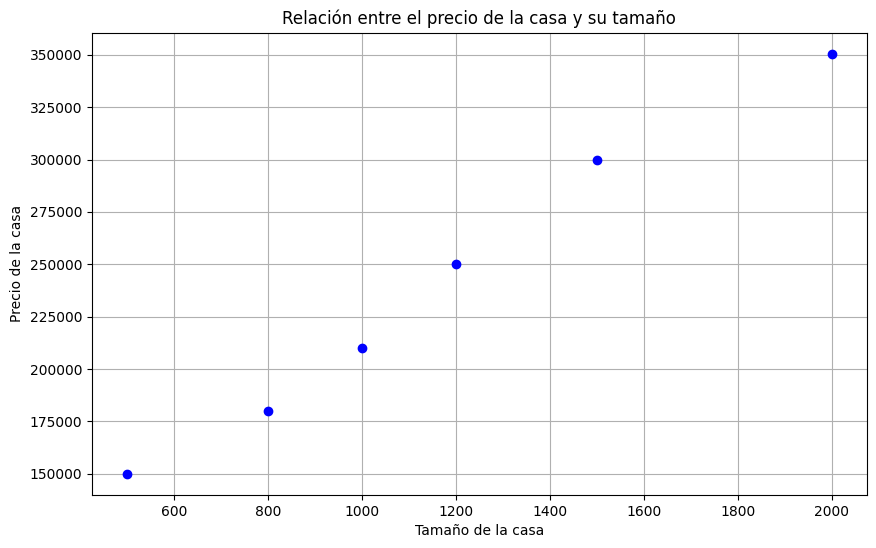

In [104]:
plt.figure(figsize=(10, 6))
plt.scatter(tamanio_casa, precio_casa, color='blue', marker='o', zorder=3)
plt.xlabel("Tamaño de la casa")
plt.ylabel("Precio de la casa")
plt.title("Relación entre el precio de la casa y su tamaño")
plt.grid(True)
plt.show()

In [105]:
# Dados los altos valores que toma el polinomio normalizaré
# Para entrenar el modelo debemos llevar el tamaño de la casa a formato np.array(-1,1)
tamanio_casa_reshaped = np.array(tamanio_casa).reshape(-1, 1)
precio_casa_reshaped = np.array(precio_casa).reshape(-1, 1)

In [106]:
grado = 4
objeto_polinomial = PolynomialFeatures(degree=grado)
polinomio = objeto_polinomial.fit_transform(tamanio_casa_reshaped)

In [107]:
regresion = LinearRegression()
regresion.fit(polinomio, precio_casa)

LinearRegression()

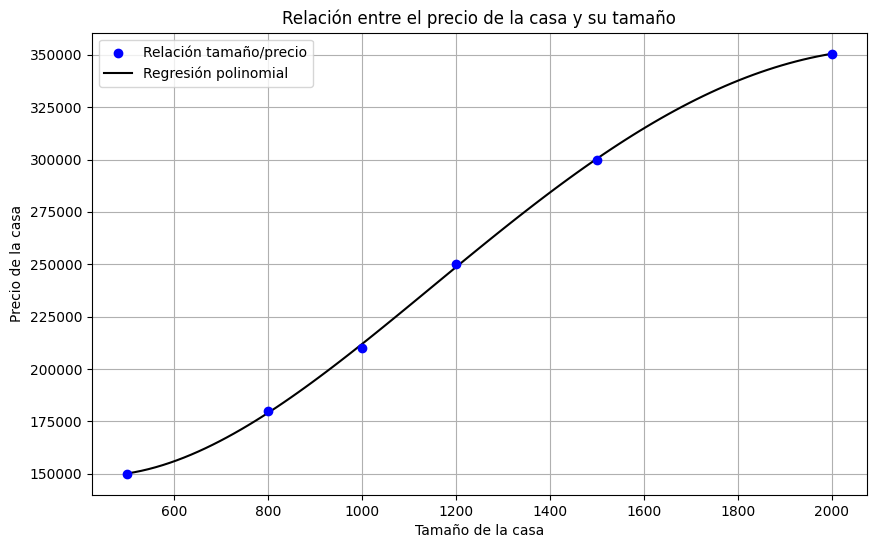

In [108]:
# Gráfico con la regresión

x_range = np.linspace(min(tamanio_casa), max(tamanio_casa), 100).reshape(-1,1)
x_range_pol = objeto_polinomial.transform(x_range)

plt.figure(figsize=(10, 6))
plt.scatter(tamanio_casa, precio_casa, color='blue', marker='o', zorder=3, label="Relación tamaño/precio")
plt.plot(x_range, regresion.predict(x_range_pol), color="black", label="Regresión polinomial")

plt.xlabel("Tamaño de la casa")
plt.ylabel("Precio de la casa")
plt.title("Relación entre el precio de la casa y su tamaño")
plt.grid(True)

plt.legend()
plt.show()

# Problemas del modelo
Podemos ver que si bien el modelo toma a la perfección los valores de las casas en relación a su tamaño, lo cierto es que es tan perfecto que podríamos decir que fue "sobre-entrenado", es por esto que debemos aplicar una penalización, una de esas de la de *Lasso*.

Cabe aclarar que de este punto en adelante esta todo comentado ya que no tengo conocimiento sobre la correcta implementación de esta penalización y al ser tan parecido el polinomio simplemente lo deje comentado

In [110]:
# from sklearn.linear_model import Lasso

In [109]:
#penalizacion = 10
#regresion_lasso = Lasso(alpha=penalizacion)
#regresion_lasso.fit(polinomio, precio_casa_reshaped)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.522e+07, tolerance: 2.851e+06
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=1000)

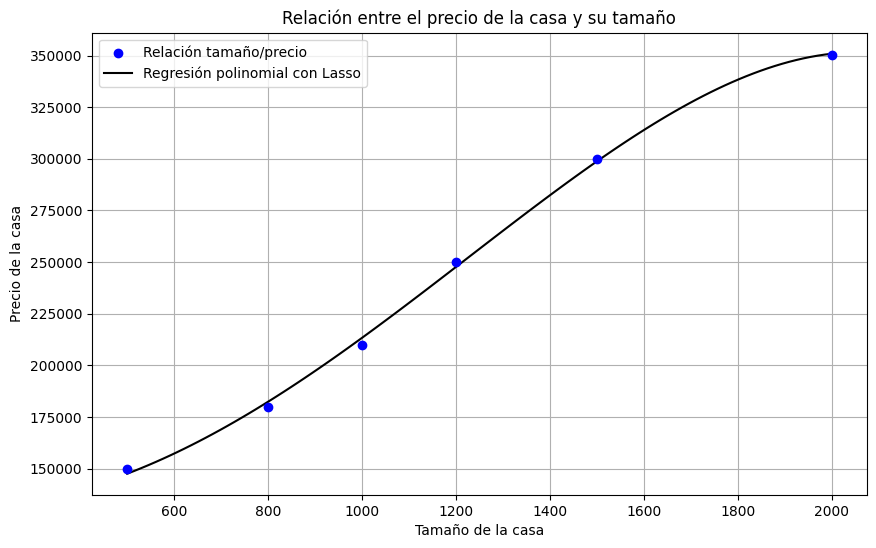

In [111]:
# Gráfico con Lasso

#x_range = np.linspace(min(tamanio_casa), max(tamanio_casa), 100).reshape(-1, 1)
#x_range_pol = objeto_polinomial.transform(x_range)

#plt.figure(figsize=(10, 6))
#plt.scatter(tamanio_casa, precio_casa, color='blue', marker='o', zorder=3, label="Relación tamaño/precio")
#plt.plot(x_range, regresion_lasso.predict(x_range_pol), color="black", label="Regresión polinomial con Lasso")

#plt.xlabel("Tamaño de la casa")
#plt.ylabel("Precio de la casa")
#plt.title("Relación entre el precio de la casa y su tamaño")
#plt.grid(True)

#plt.legend()
#plt.show()